In [15]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats

from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.direct_model import DirectModel
from sasdata.dataloader.loader import Loader
from sasmodels import weights
from sasmodels.data import empty_data1D

from bumps.names import *
from bumps.fitters import fit
from bumps.formatnum import format_uncertainty
from bumps import parameter

import glob
import uuid
import re

from saxs_data_processing import io

from sklearn import metrics

from autophasemap.

## Set up scattering model

working in angstroms for q and particle diameters


In [2]:
sld_silica = 8.575
sld_etoh = 9.611

q_min = -2
q_max = 0
n_q = 501

# r in nm
r_min = 20
r_max = 500
n_r = 501

target_r = 600 #(120 nm diameter particles)
target_pdi = 0.1
delta_sld = np.abs(sld_silica - sld_etoh)





## sasmodels sphere as target I

In [3]:
def target_intensities(q, r, pdi):
    """
    Calculate target scattering intensity for a given q array, radius (angstroms), and pdi
    """
    kernel = load_model('sphere')
    data = empty_data1D(q)
    pars = dict(scale = 1, background = 0.001, sld = sld_silica, sld_solvent = sld_etoh, radius = 50)
    model = DirectModel(data, kernel)
    #model.radius.range(10, 5000)
    #model.scale.range(0, 5)
    
    I = model(radius = 40, radius_pd = 0.1, radius_pd_type = 'gaussian', radius_pd_n = 35, radius_pd_nsigma = 3)

    return I

In [4]:
## Load subtracted data

In [5]:
def load_data_files(root_dirs, bio_conf):
    """
    Finds all .dat files, returns those with bio configuration equal to bio_conf

    Non-recursively checks all root directories for .dat files, parses them, if biocube conf is correct, returns 


    Returns: dict(sample_uuid:brenden data tuple)
    """

    # 1. Find all the filepaths in root directories of .dat files
    fps_agg = []
    for root_dir in root_dirs:
        fps = glob.glob('**.dat', root_dir=root_dir, recursive=False)
        fps_agg.extend([root_dir + fp for fp in fps])


    # 2. process filepaths, get uuids for those that are sample data (as opposed to backgrounds). load those that match target config
    data_fps = {}
    sample_data = {}
    not_data_count = 0
    not_esaxs_count = 0
    for fp in fps_agg:
        uuid_str = fp.split('/')[-1].split('.')[0]
        #print(uuid_str)
        data_val = io.read_1D_data(fp)
        sample_data[uuid_str] = data_val
                

    return sample_data
        

In [6]:
def is_valid_uuid(uuid_to_test, version=4):
    try:
        # check for validity of Uuid
        uuid_obj = uuid.UUID(uuid_to_test, version=version)
    except ValueError:
        return False
    return True

In [7]:
data = load_data_files(['./test_1d/'], bio_conf=24)

In [8]:
test_uuid = '01cddefc-e6a6-41aa-9052-06286b12b8fe'
test_data = data[test_uuid][0]

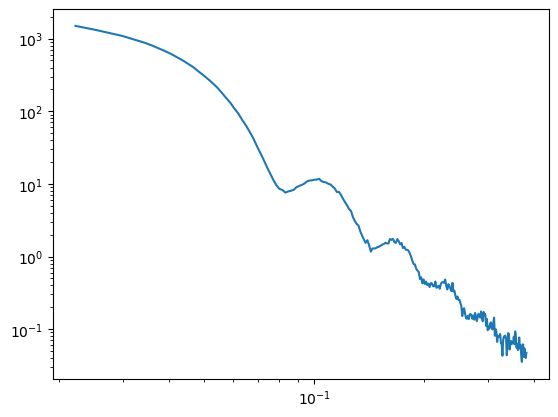

In [9]:
plt.loglog(test_data['q'], test_data['I'])

In [10]:
q = test_data['q'].to_numpy()

In [11]:
target_I = target_intensities(q, target_r, target_pdi)

In [12]:
## scale both to 1

In [13]:
target_I = target_I/target_I[0]
meas_I = test_data['I']/test_data['I'].iloc[0]

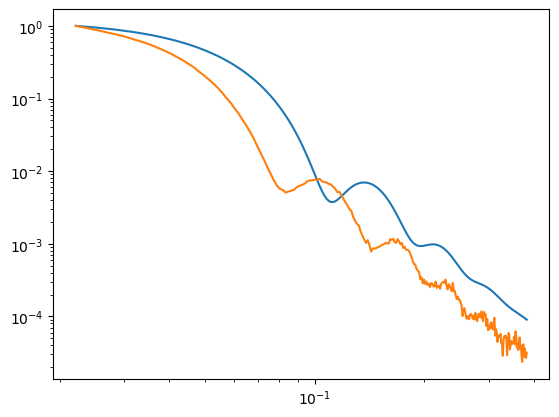

In [14]:
fig, ax = plt.subplots()

ax.loglog(q, target_I)
ax.loglog(q, meas_I)

In [17]:
rmse = metrics.root_mean_squared_error(target_I, meas_I)

In [20]:
r2 = metrics.r2_score(target_I, meas_I)

starting  b59dad1a-4440-453a-b36a-9efd6e49a282
starting  fe8e4a28-cb6b-4396-adc3-a51f49838d54
starting  a6974af8-5b2d-431a-94df-d35c0be3ee54
starting  403cbac3-a2e0-44f0-aca4-9313b8775a4e
starting  5edc0763-1f2c-44f2-bf68-db785ae258b0
starting  50d45172-6479-4d31-9ef6-bea791278606
starting  a9d67fc5-2e59-4f51-a904-9cac957c9e73
starting  c2755e87-75e2-48c6-b27a-739971d1775c
starting  1c809d50-4605-4865-aa13-13649203ede8
starting  a3f7d49b-cc77-4468-aae0-ad451027ddc0
starting  852b1fcf-ea63-4436-bd20-9ebf44baf999
starting  3b660550-7e2e-4815-ba89-ac39039b2f38
starting  01cddefc-e6a6-41aa-9052-06286b12b8fe
starting  83d8158b-ea97-4925-af7c-8fa89acc9319
starting  f4b66637-2c73-4d0b-83ba-3f7e3b3f3c06
starting  decddea8-7eee-4ca3-9344-5b6f201057b3
starting  6abcfcc8-cf8d-4a5e-a92f-f3afd8023fbd
starting  ba91b97c-6a58-431f-99ae-091ae1a16bc8
starting  2811e6fa-3ff3-42bc-a3cf-bcc61a8cf0fd
starting  3ae01d8c-6757-4aa4-8701-a4f231f6a81c
starting  f69628da-ff56-4f3a-ba2e-816036b87557
starting  5a6

/tmp/ipykernel_37735/491411798.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


starting  fedab157-3d87-4f8b-b09b-590c966aa0ba
starting  ad84fa96-1a1d-4b08-906a-64405d8b14c4
starting  328c652f-9166-4c49-ad89-6445d14b89f3
starting  9b9c349b-8f9d-4f0c-829c-fa99e67e90fb
starting  38d80e08-5bd4-4e0e-9d11-a60d55148590
starting  70246cb4-9be2-45b9-8704-bb3f4ea585c5
starting  517c3f17-e084-4ef0-a79f-a7ee9183f4b9
starting  89b8593e-8436-4dfb-8430-1367d273cbc2
starting  0d339e3d-c04d-4f61-8cb0-2fd1f18006e9
starting  8559907a-1b27-4673-ae0e-602b83d86deb
starting  b683d769-9cd7-454a-b546-4e86afe5e3f4
starting  c9f1b338-8d5c-491e-ac9c-cab3df47c1e5
starting  e0ec3c4c-a1d6-4cbc-8c5c-3ed0b7a0f7eb
starting  8a0bd2de-3c21-4148-b402-efebe0043e63
starting  2027f32f-4921-4edd-95bb-849ab8220e8c
starting  22fc6d75-43ef-41aa-993b-b76a84f4c5af
starting  44e72ee1-8a86-4ffd-8aca-07ceafe5a474
starting  89639692-ddbf-413e-a0c4-bf75456e2877
starting  9aed2e5c-7127-46bd-8331-51407d127d8f
starting  eb5c038c-56ff-4457-93db-9b9702e3ff43
starting  3a3f06cf-6324-44c0-9fbe-cbe35289073b
starting  cf2

/home/bgpelkie/miniconda3/envs/sas/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


starting  7c4bcab3-4ce3-4a28-92b1-4f8a04c76603
starting  4b2d55e4-a4ec-419a-aade-a8645321f66a
starting  bc2a0ee6-c1d0-4437-bf7c-9c3184bef73f
starting  2a988138-57f5-40bf-851c-3df09f642f05
starting  ecc20fb9-daca-4f65-97ce-f1329696f7ec
starting  d0e19177-de83-4147-ad9f-8c5e3a0aeedd
starting  5452fa4a-b64c-46d7-ace2-bf1b31afc3b3
starting  759bc1ef-f128-4db0-afec-489804bd5a62
starting  7586d345-a4e0-455e-aaf8-ee04edab6bdd
starting  f5e32498-0689-4e74-9a45-9c17edf776b9
starting  289532b3-a4c8-4db7-93ff-9edc14d5d2c8
starting  a9ad98c9-82d7-4c69-851e-56ddb16bd5f5
starting  4ccc9a11-4c0b-48a4-848e-edcdd5c8da69
starting  48117328-d486-4f9f-96ab-b0034fe30cd5


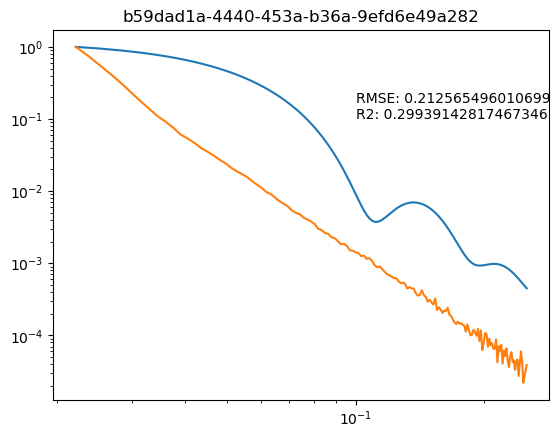

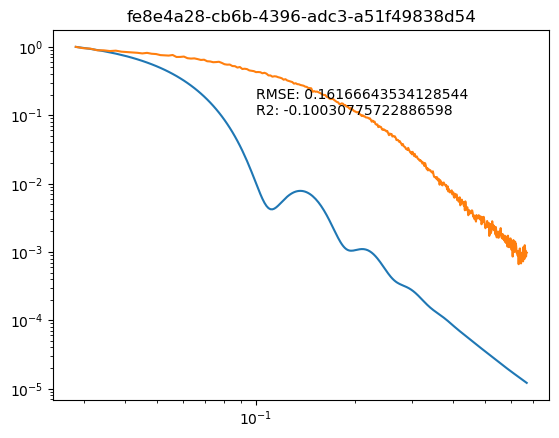

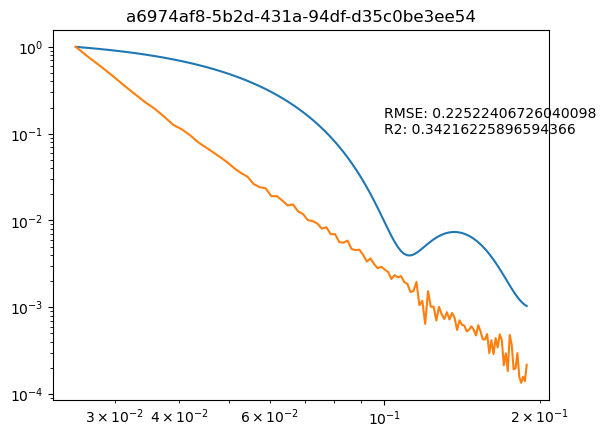

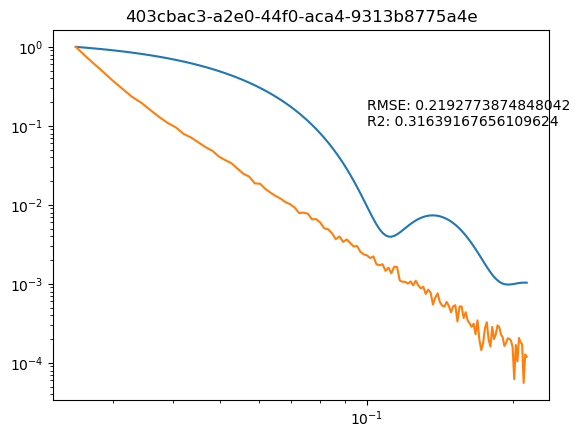

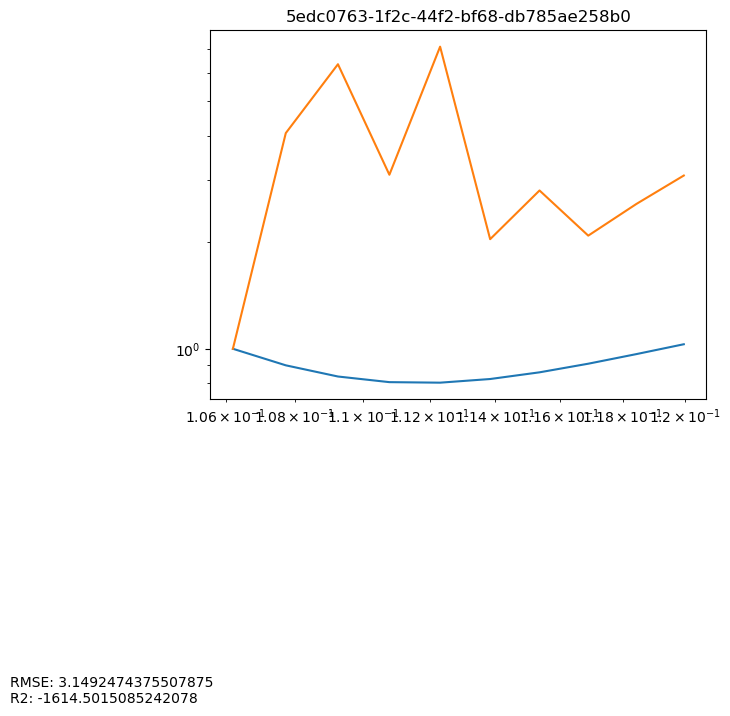

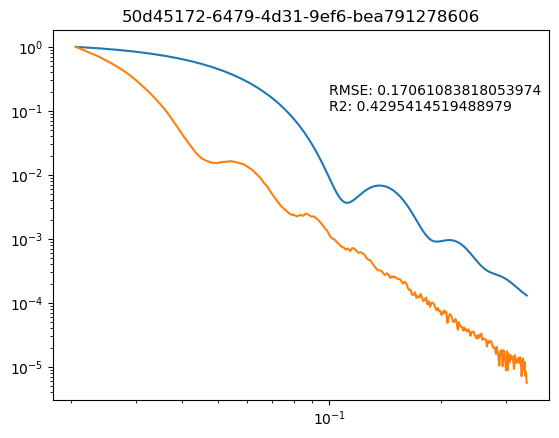

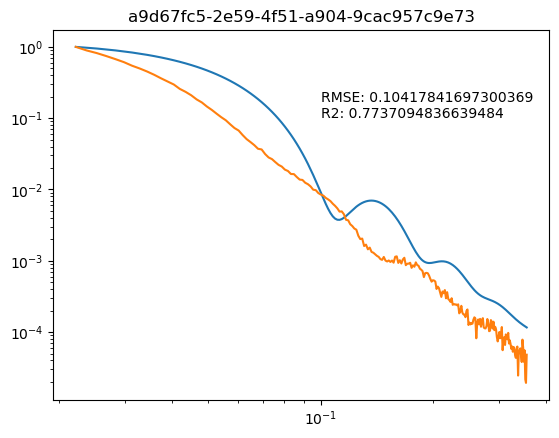

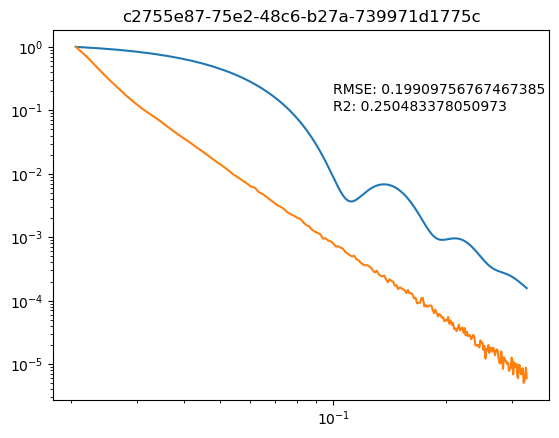

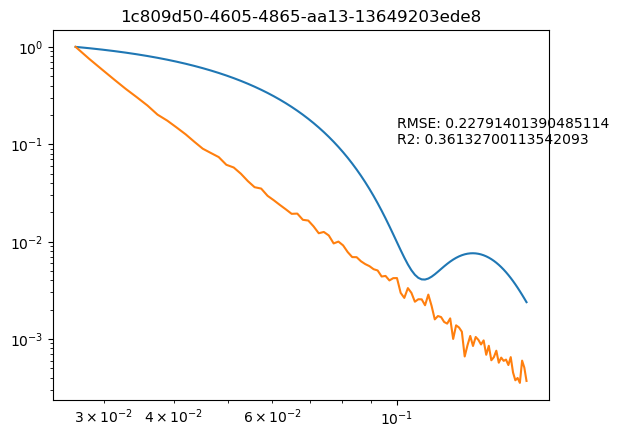

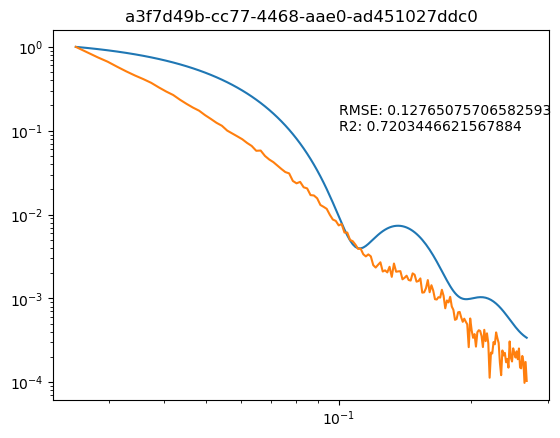

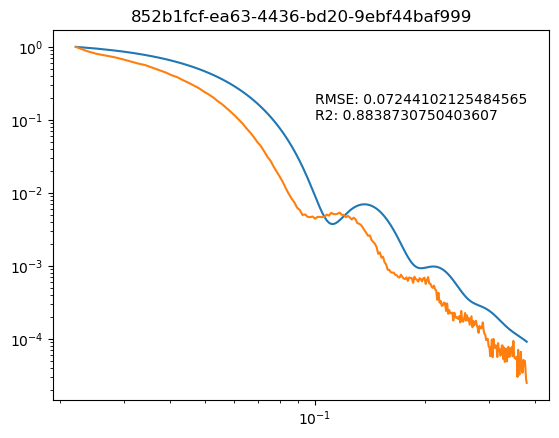

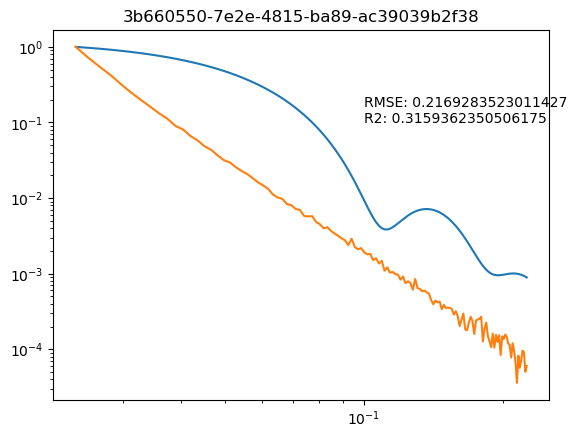

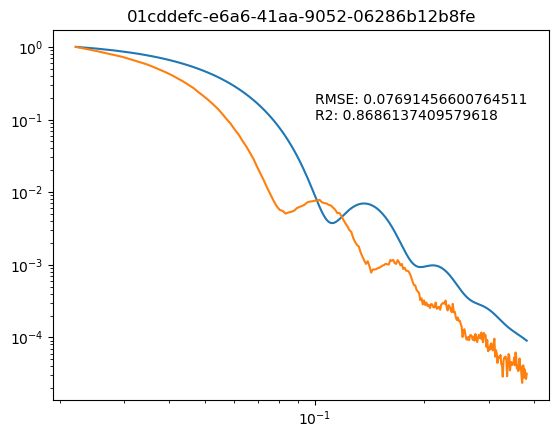

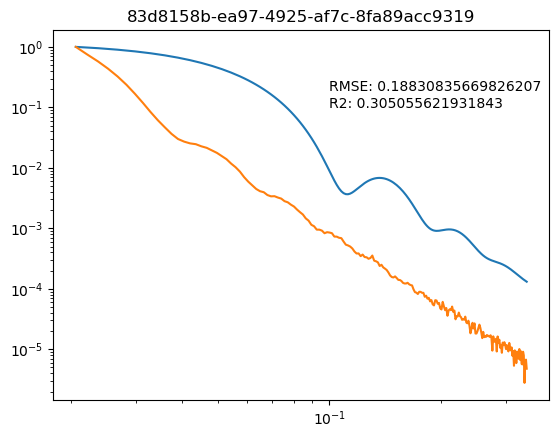

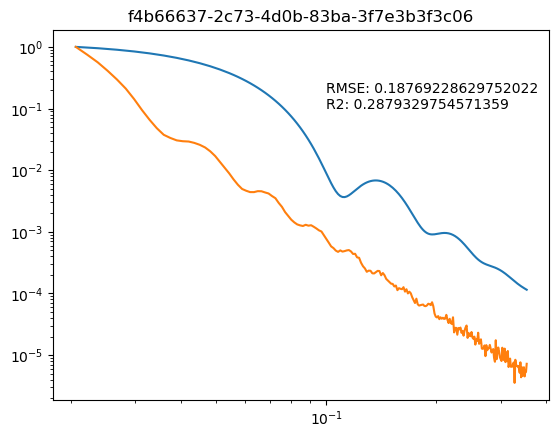

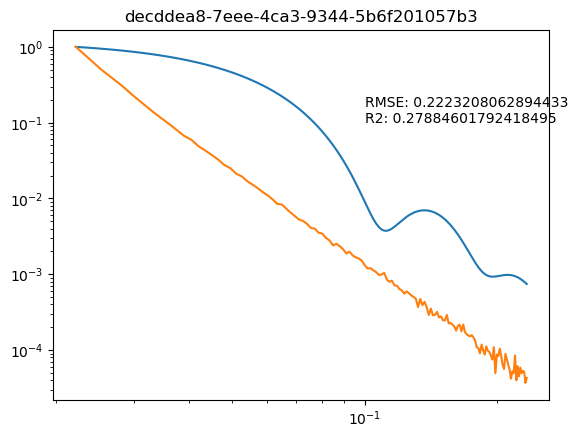

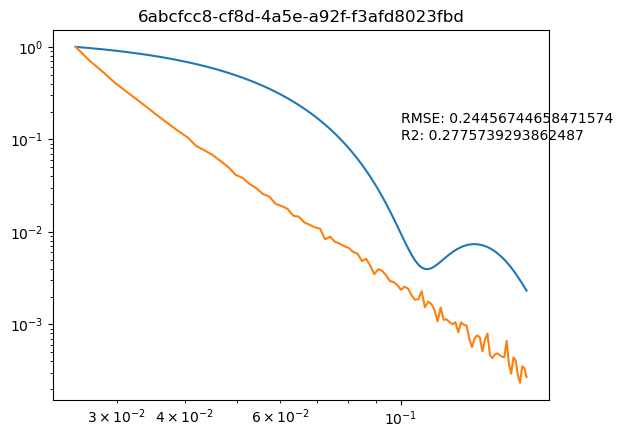

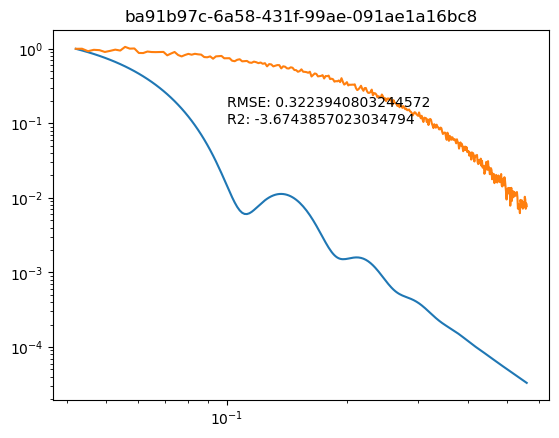

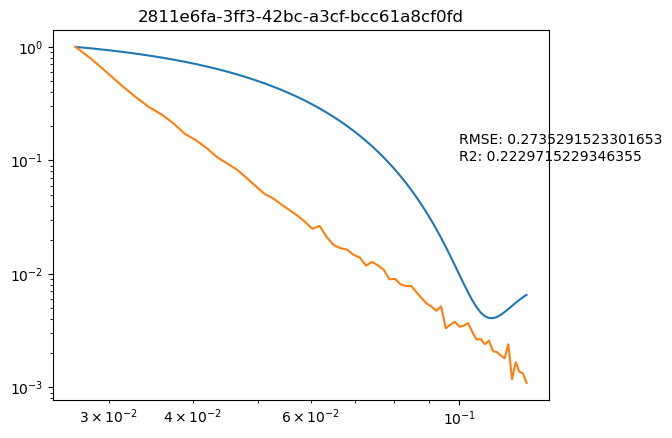

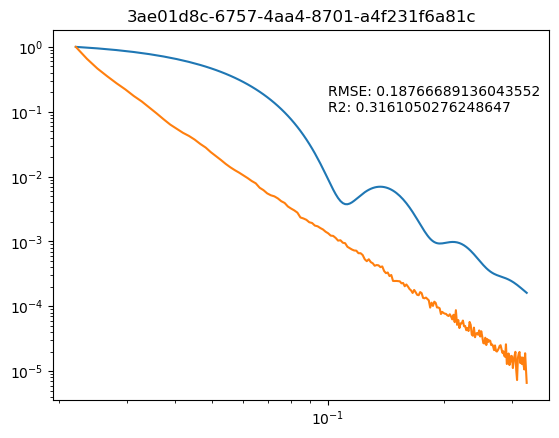

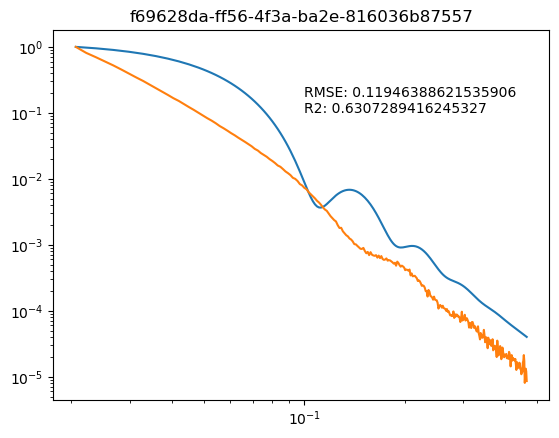

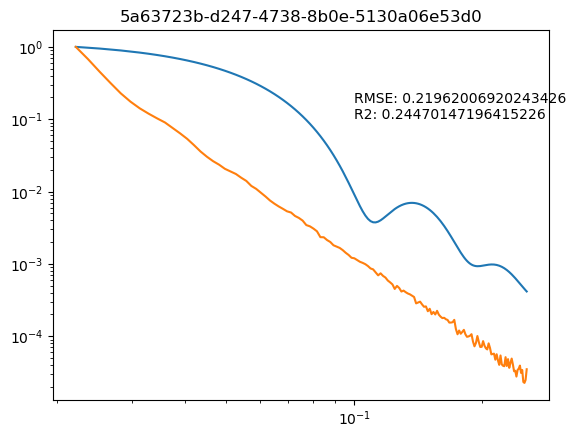

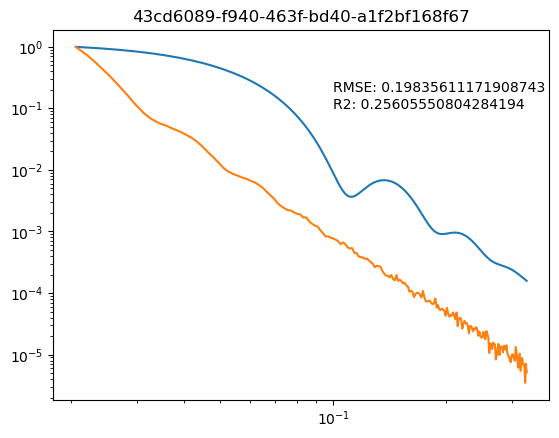

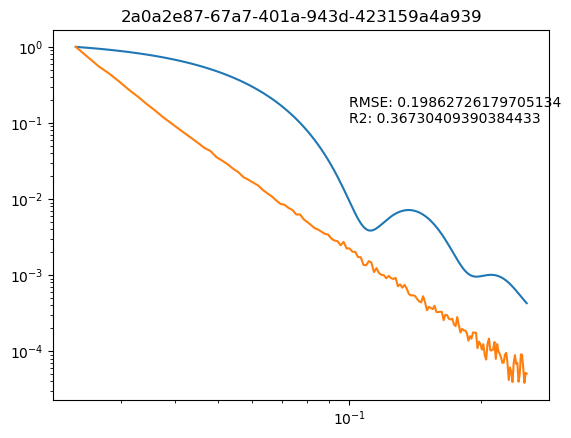

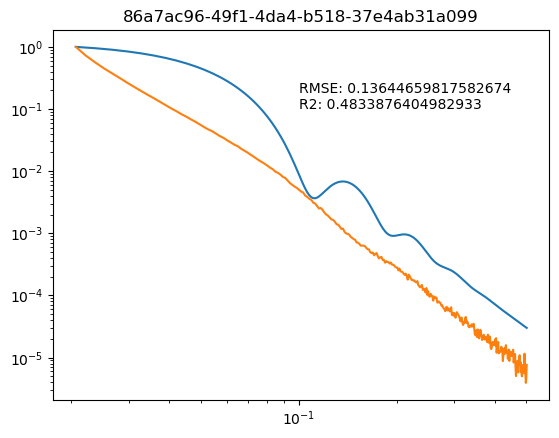

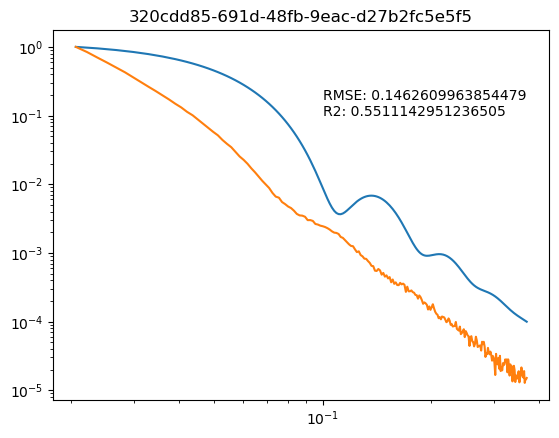

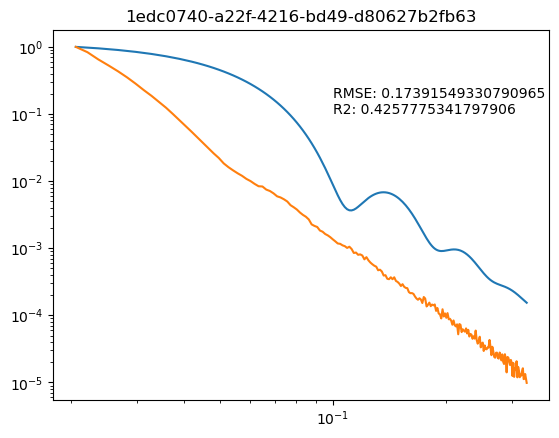

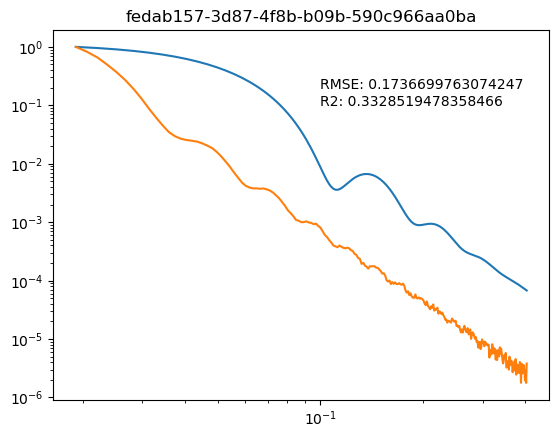

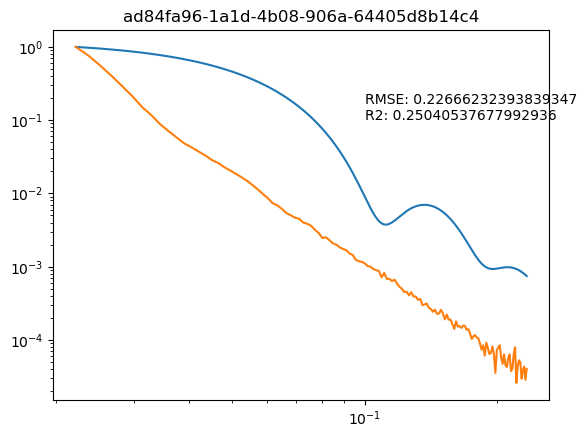

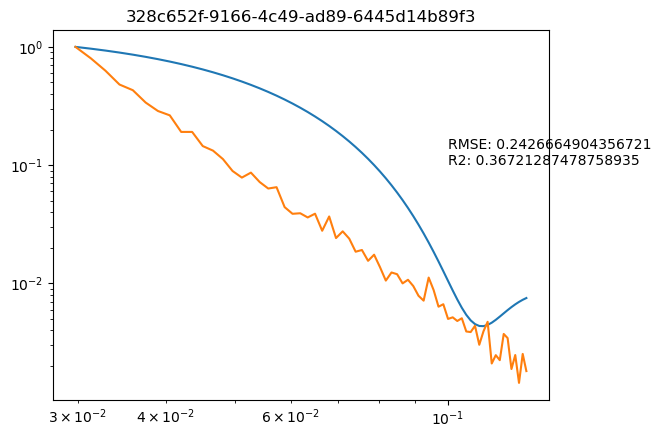

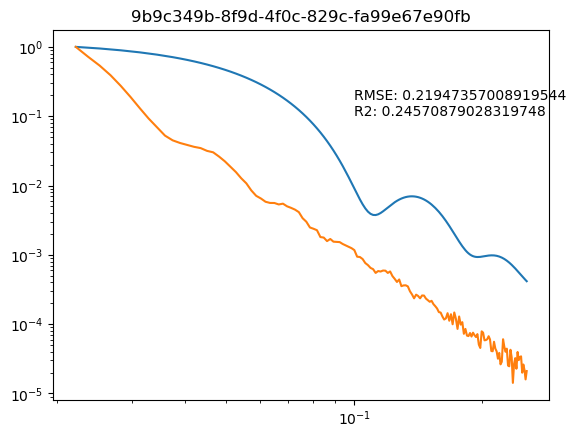

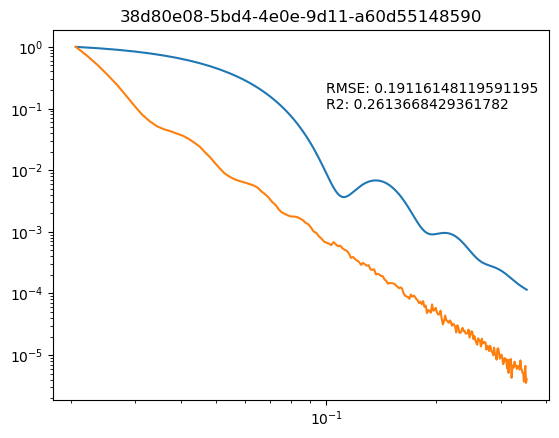

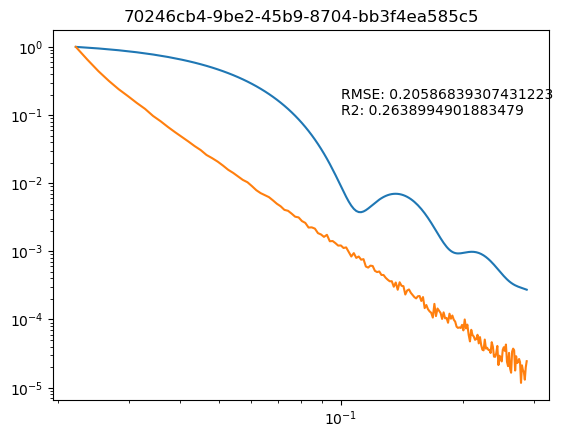

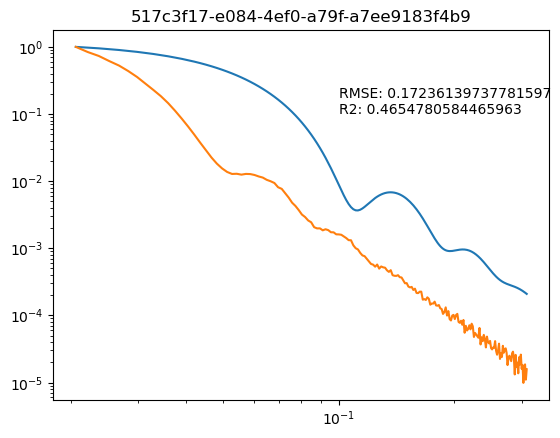

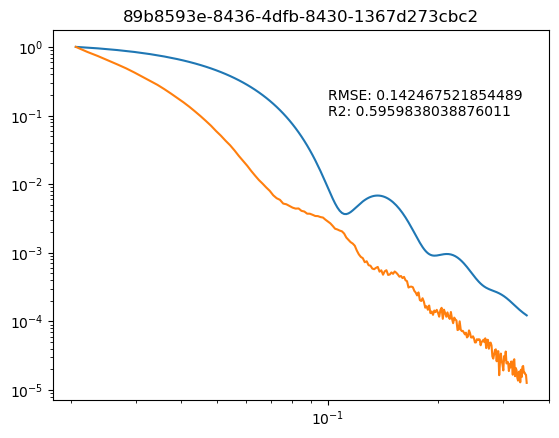

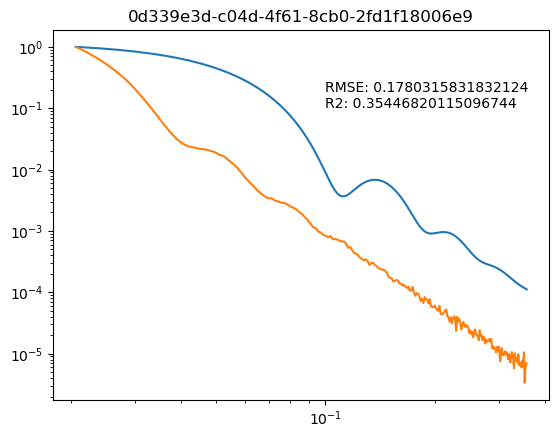

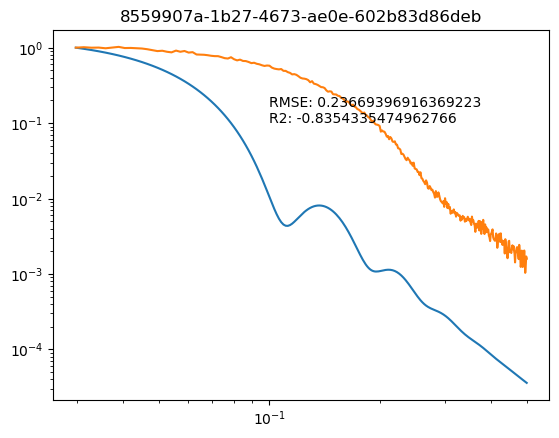

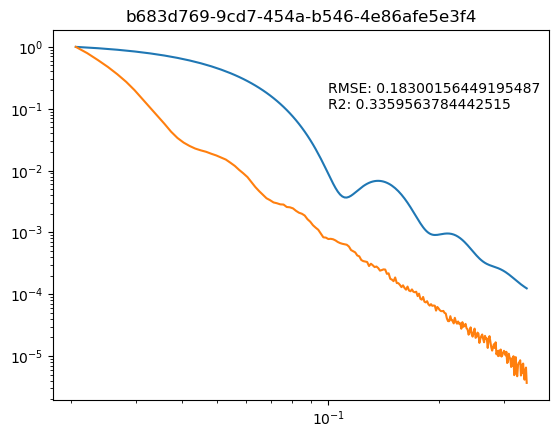

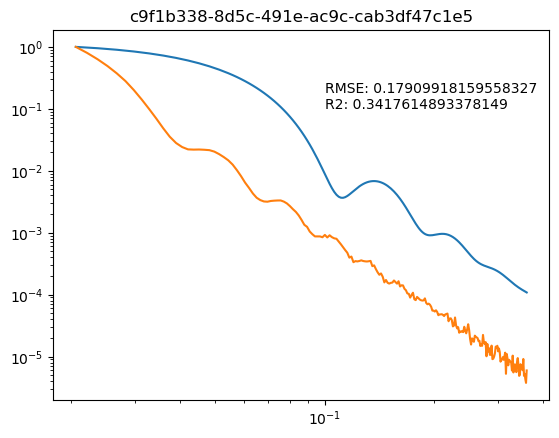

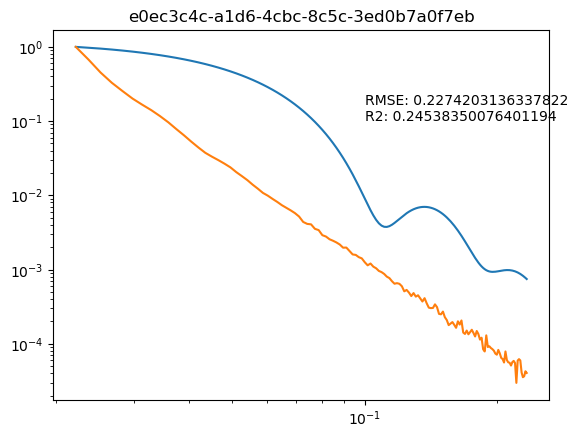

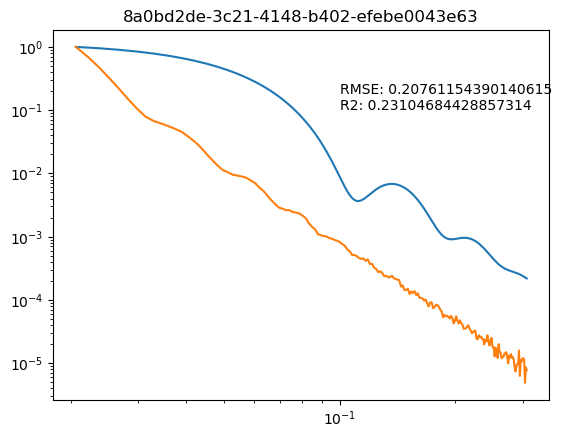

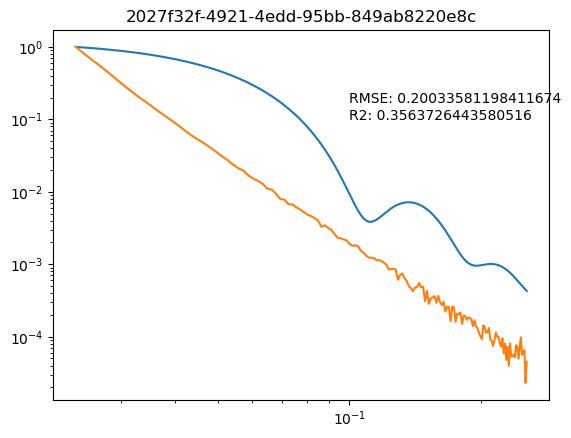

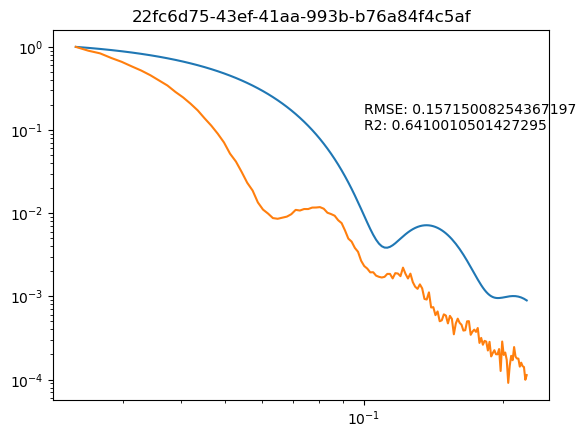

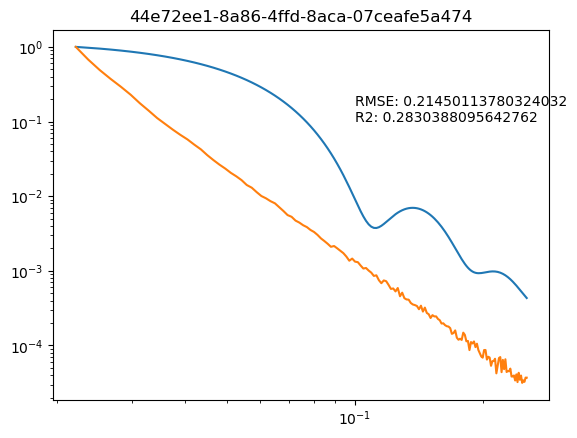

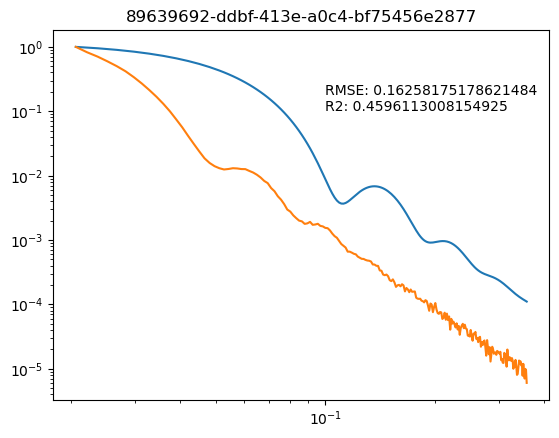

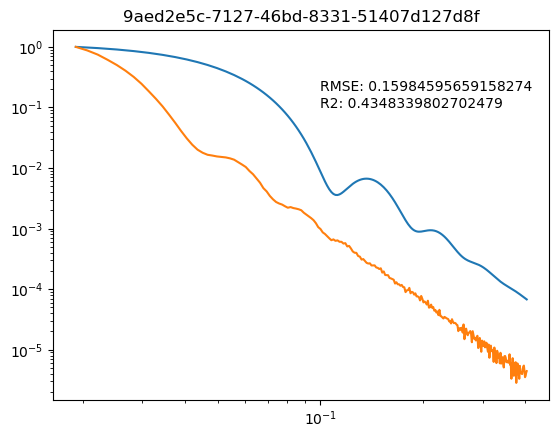

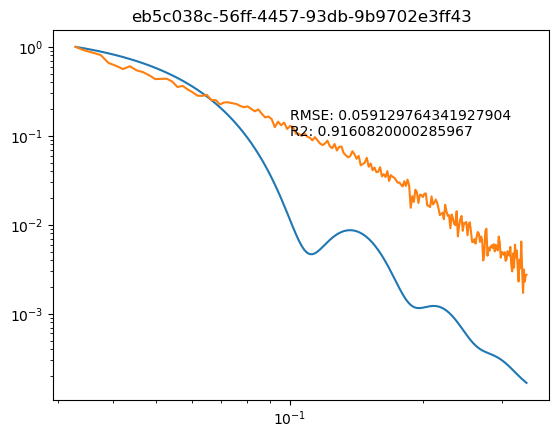

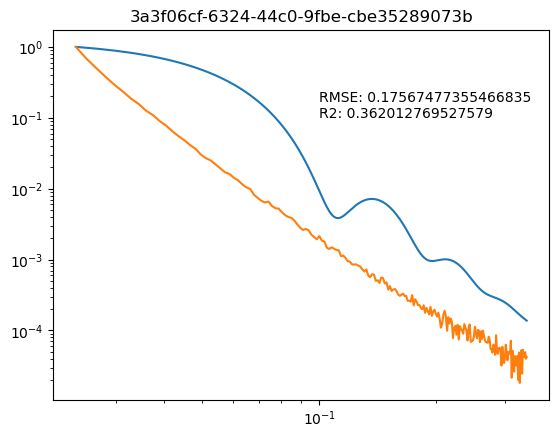

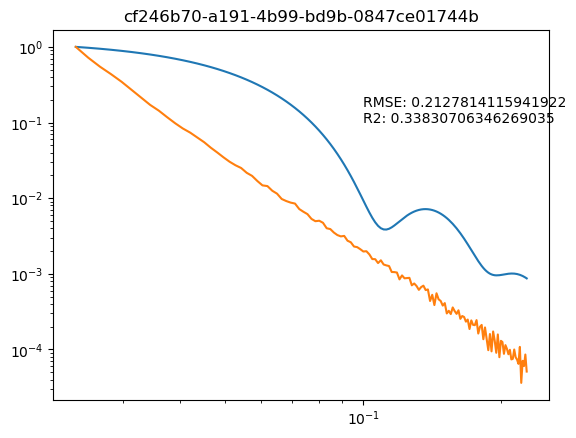

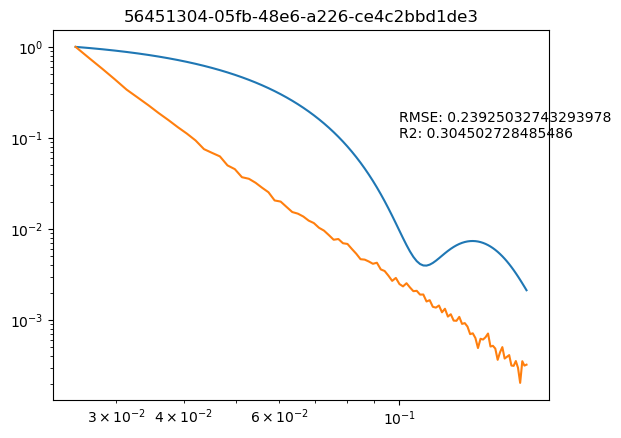

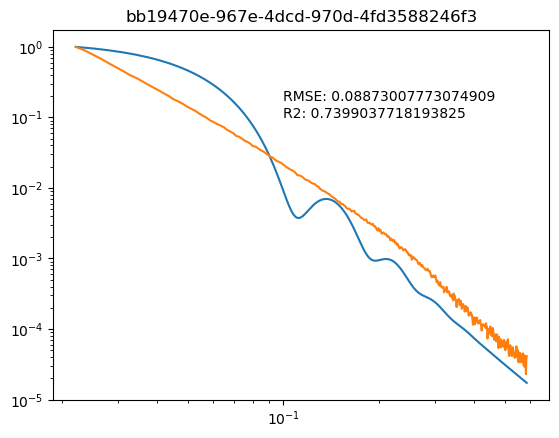

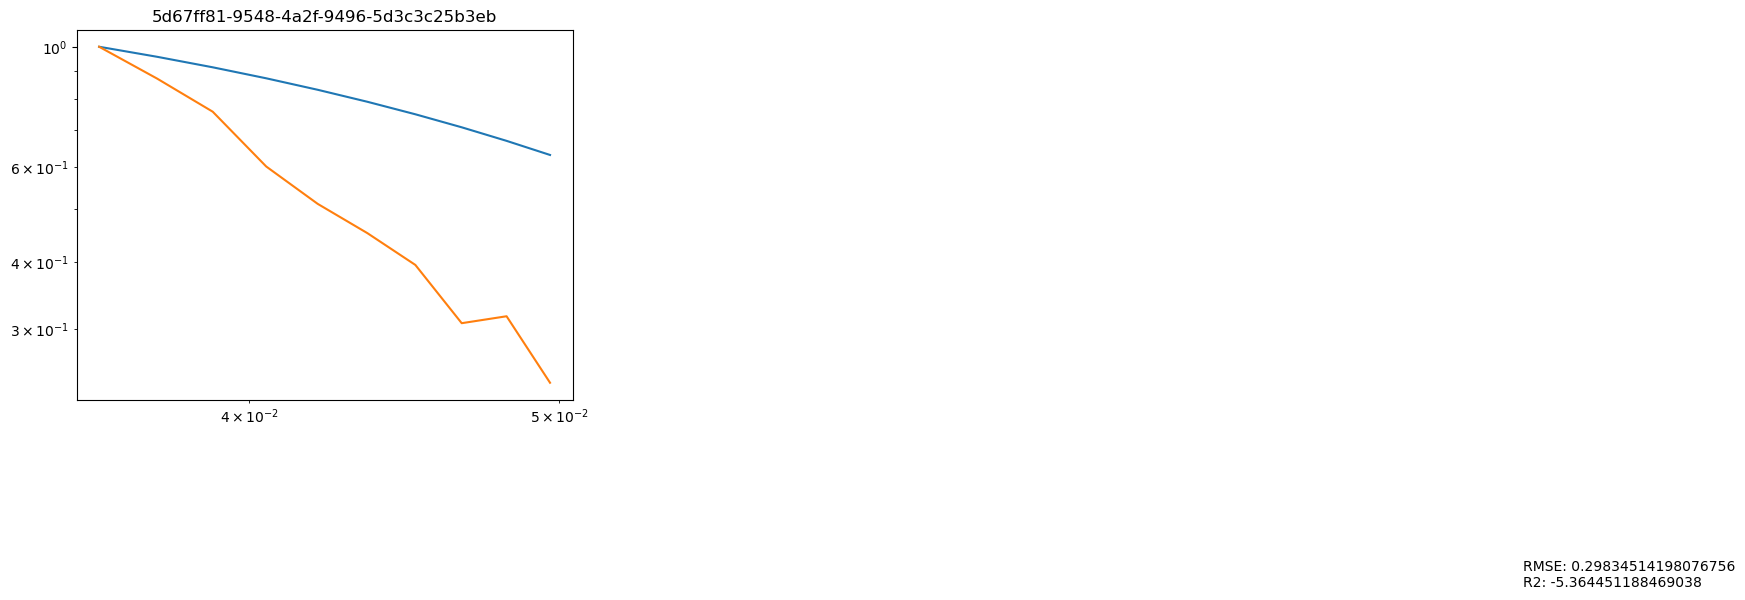

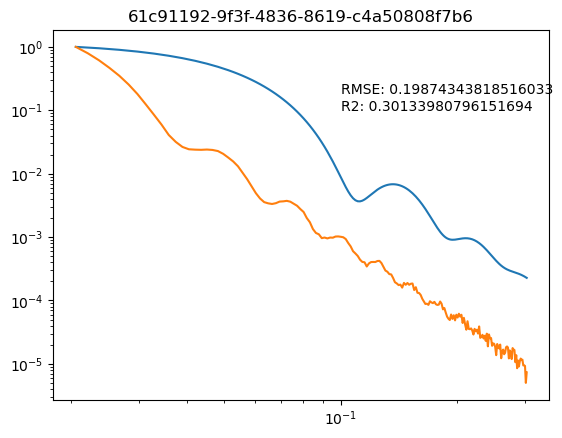

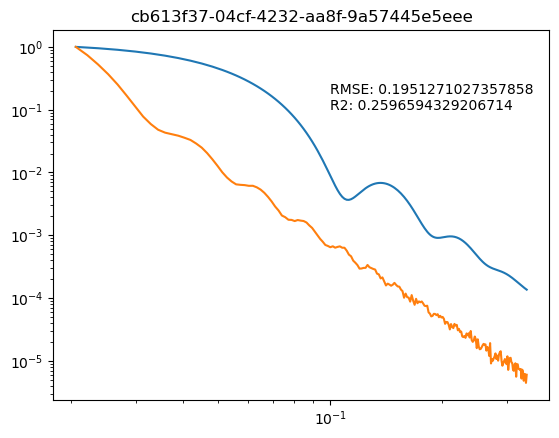

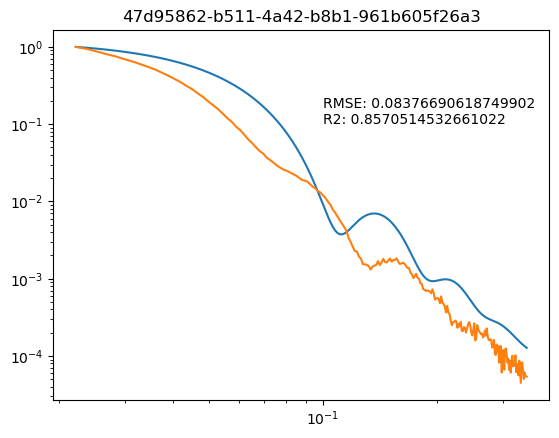

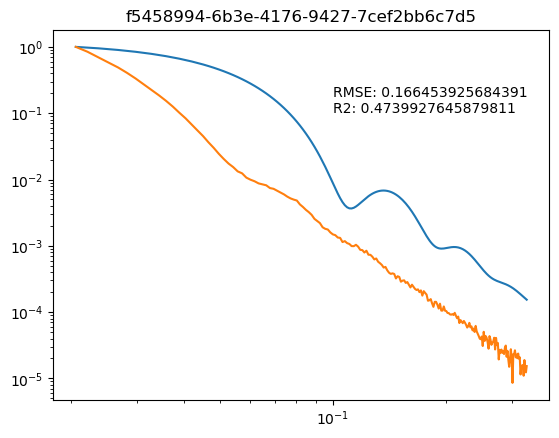

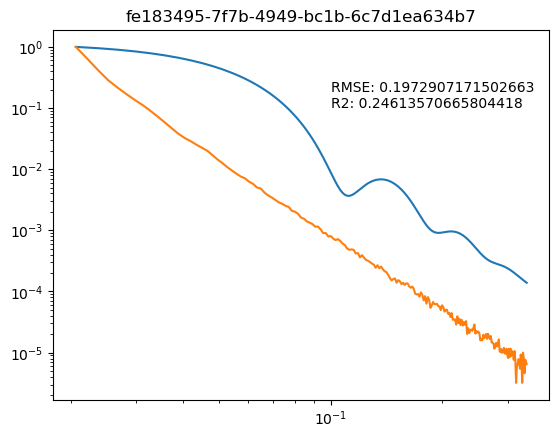

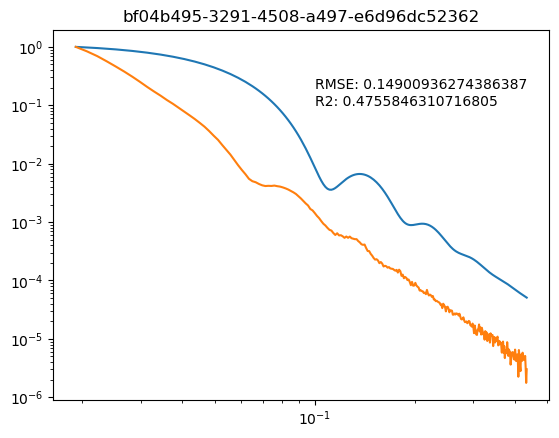

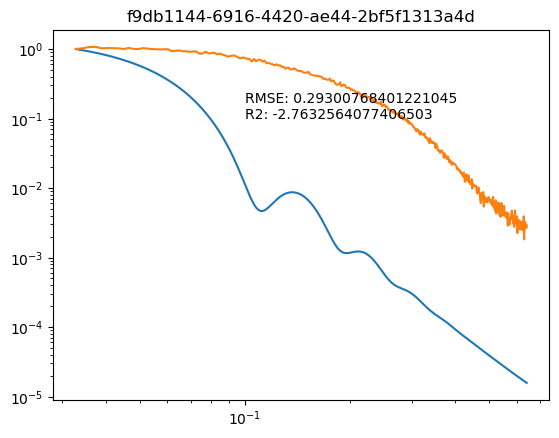

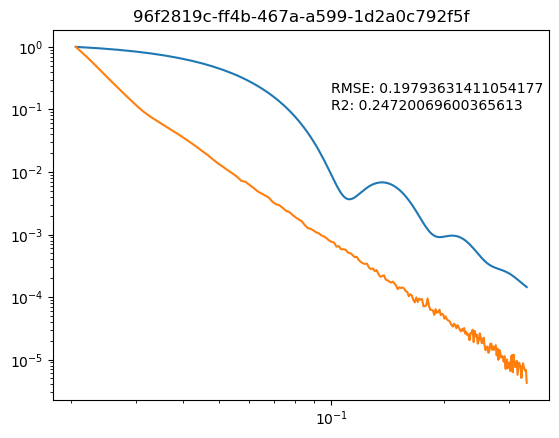

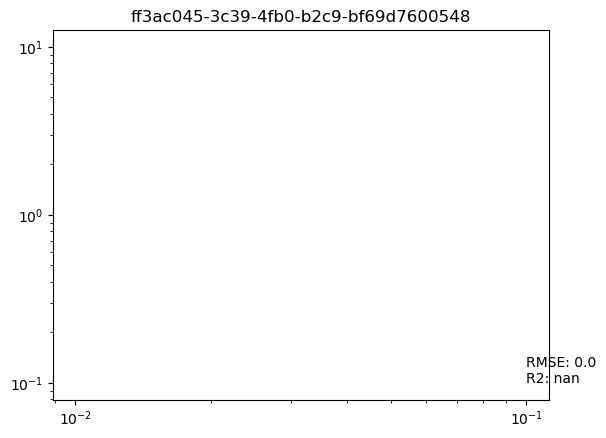

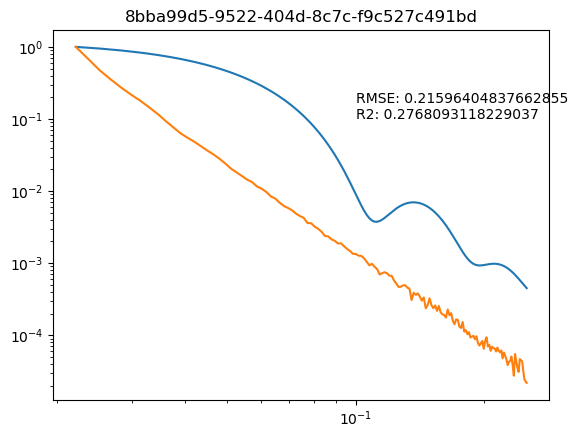

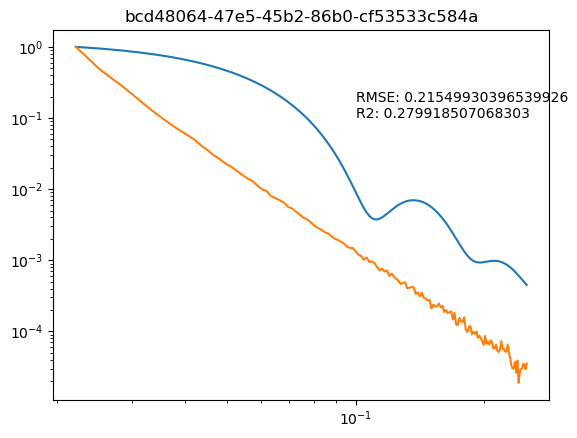

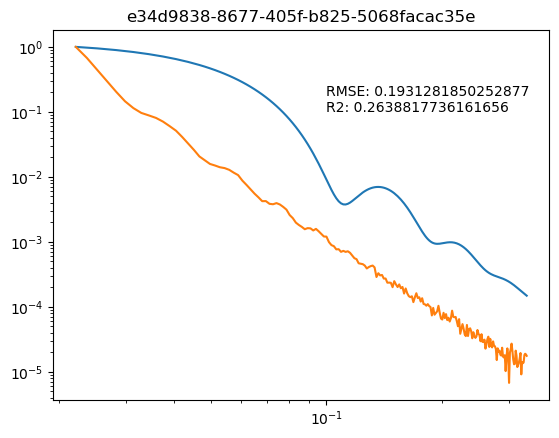

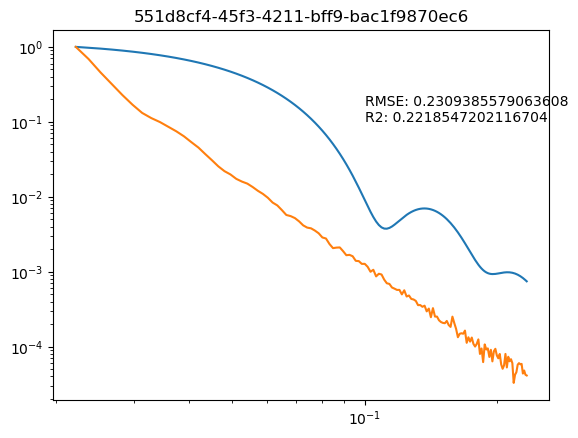

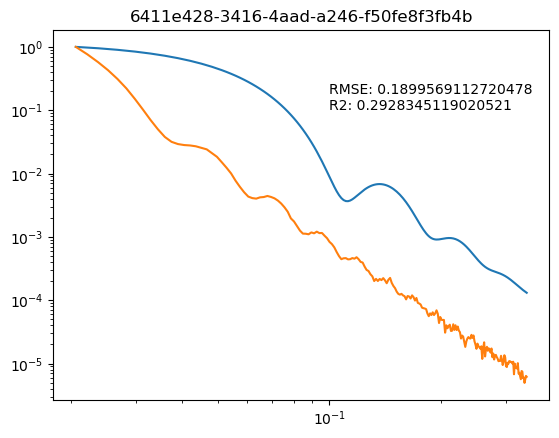

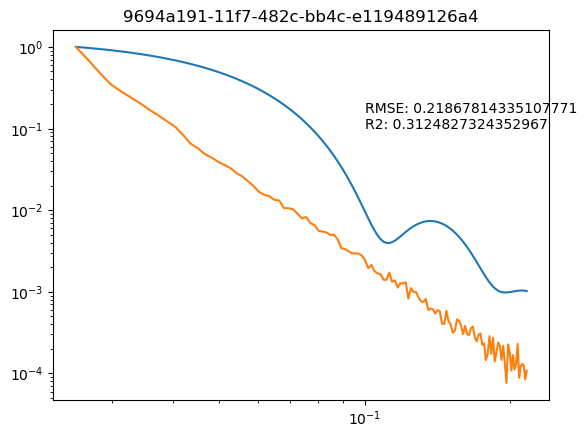

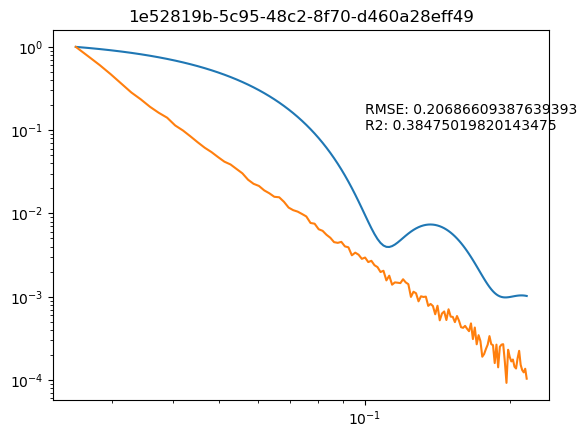

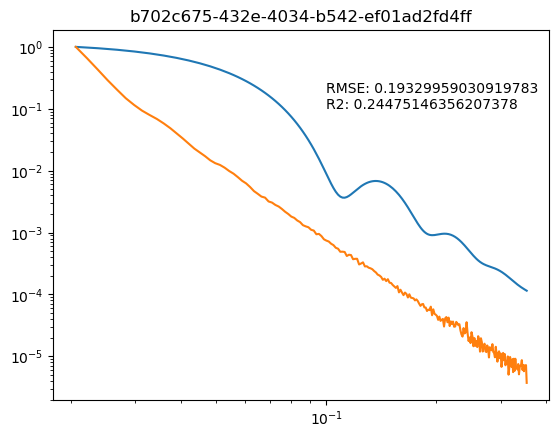

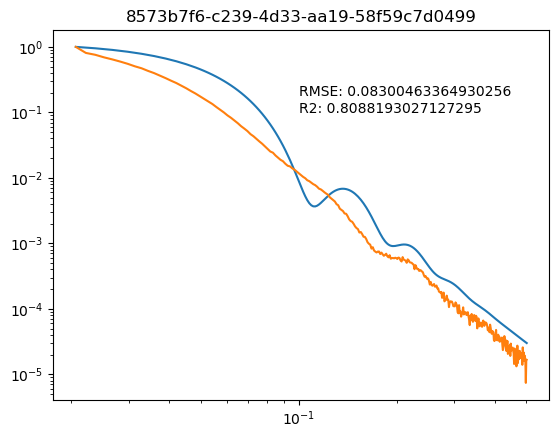

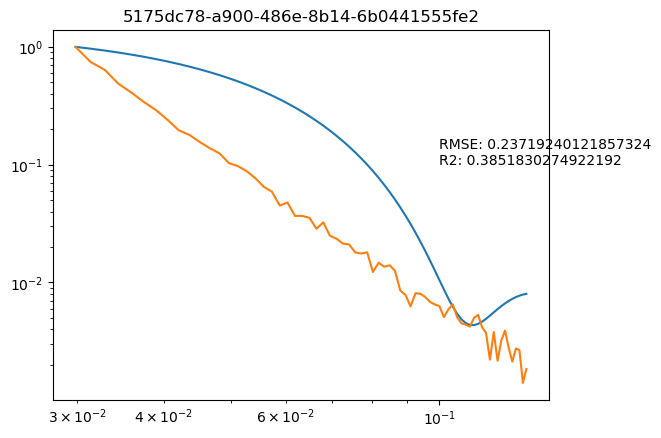

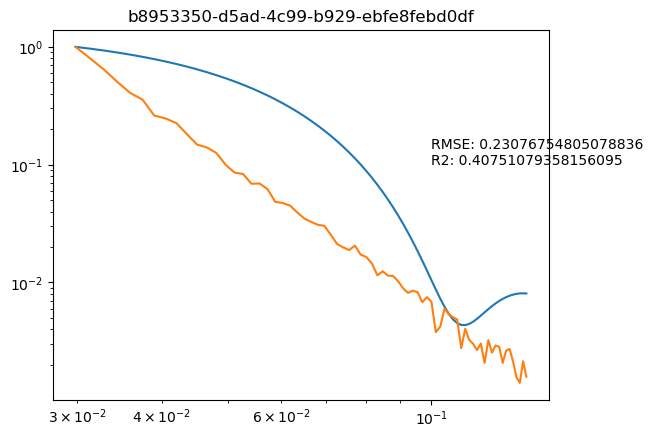

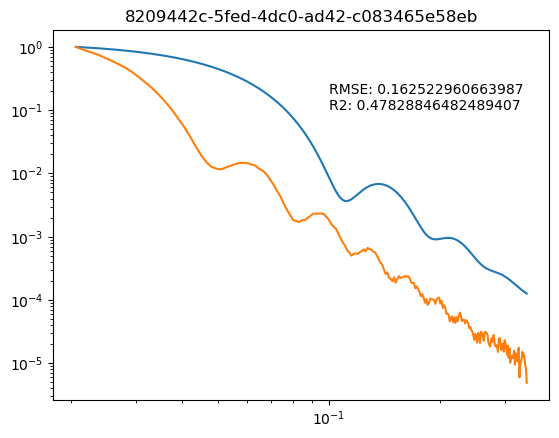

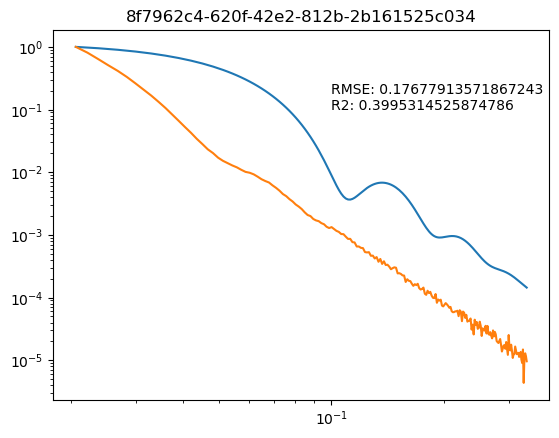

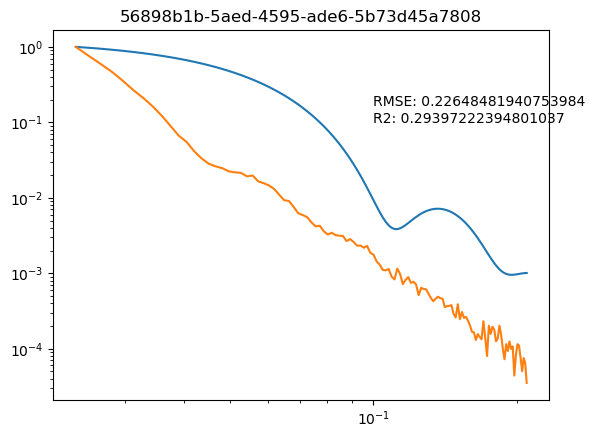

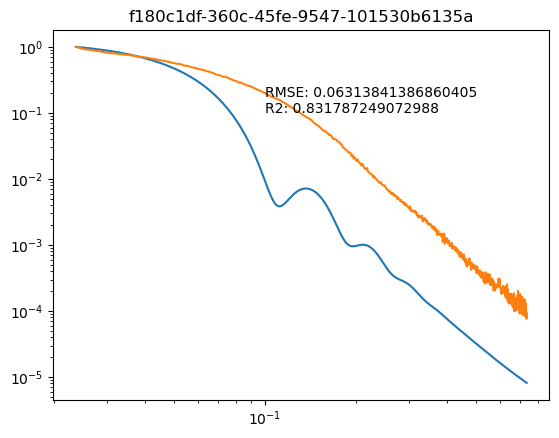

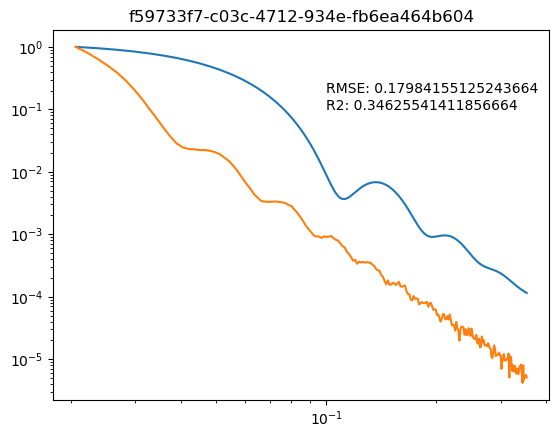

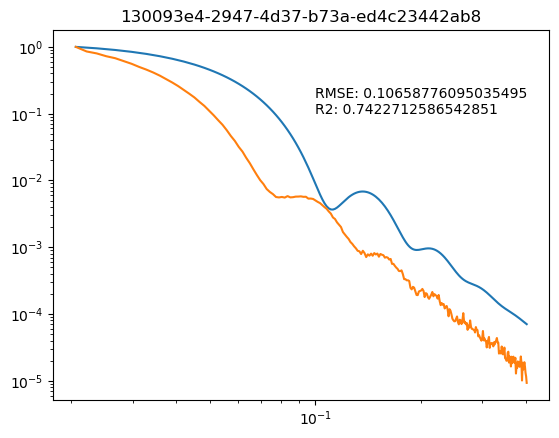

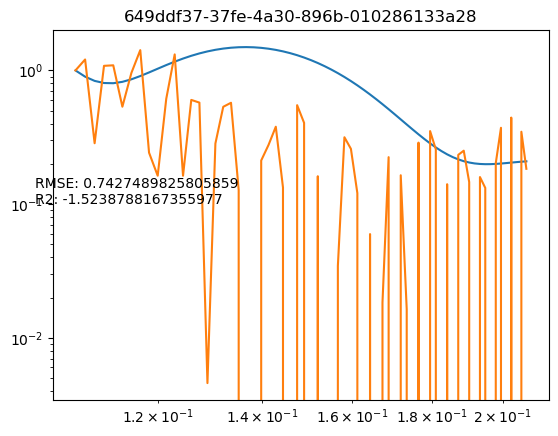

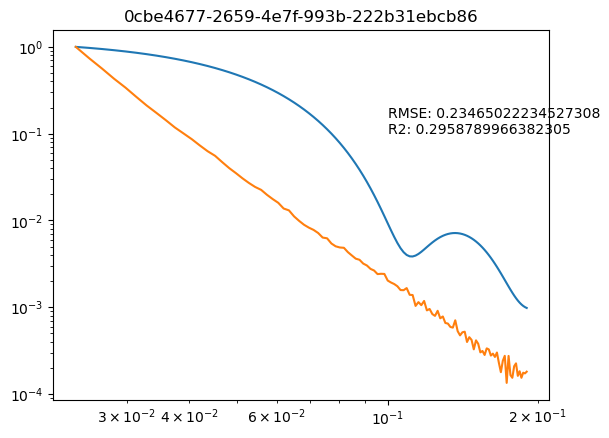

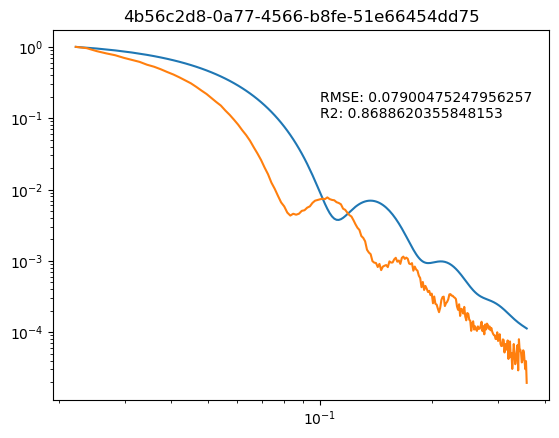

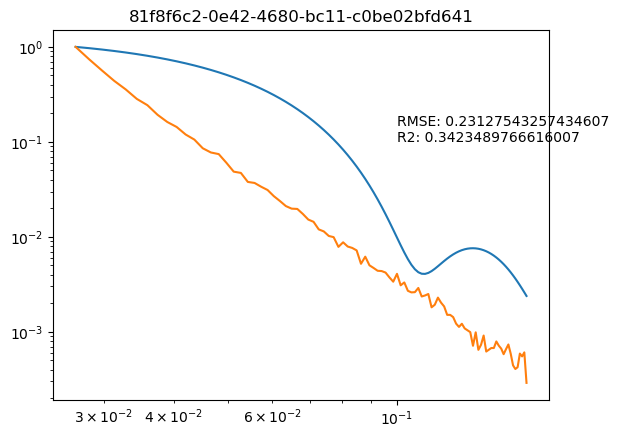

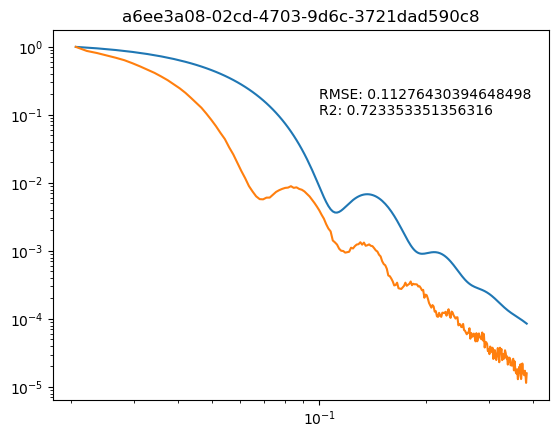

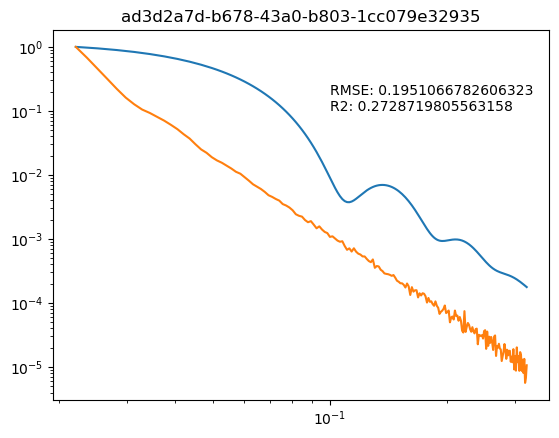

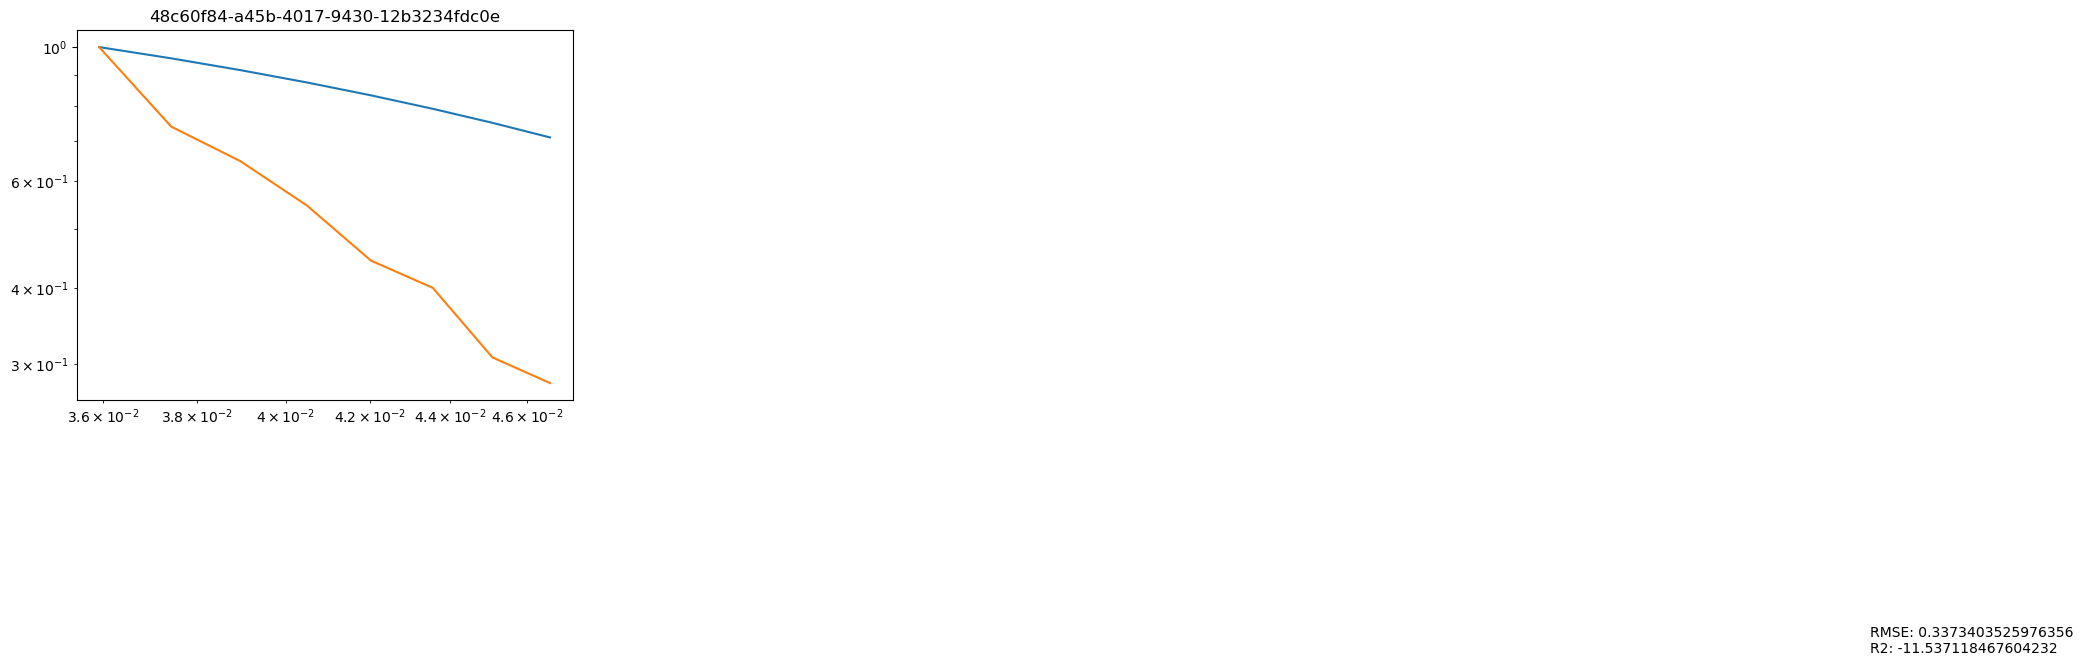

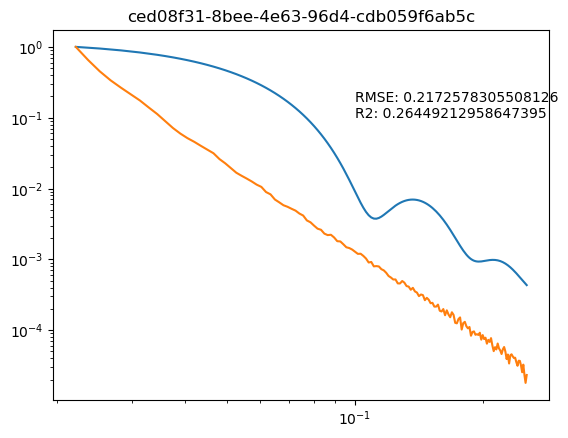

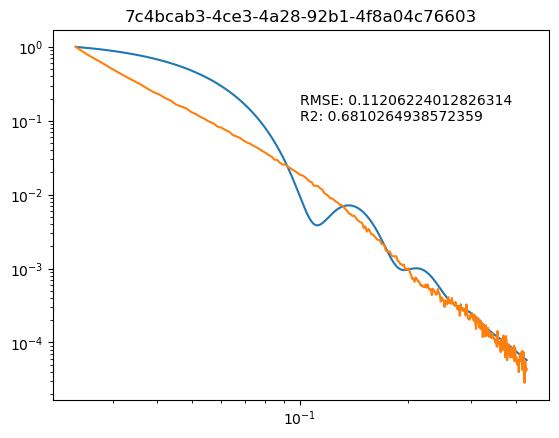

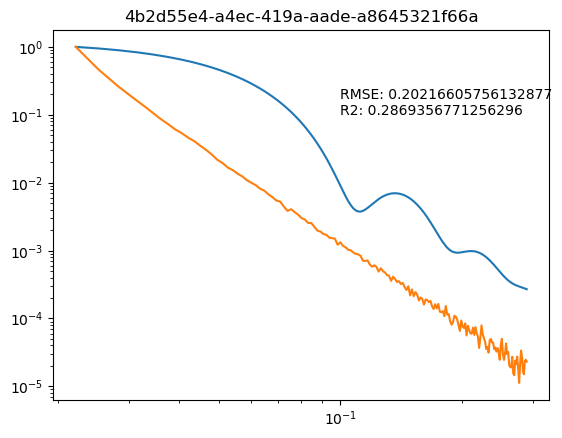

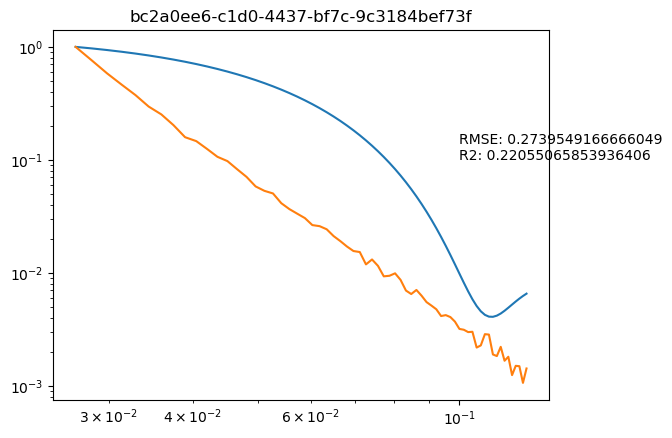

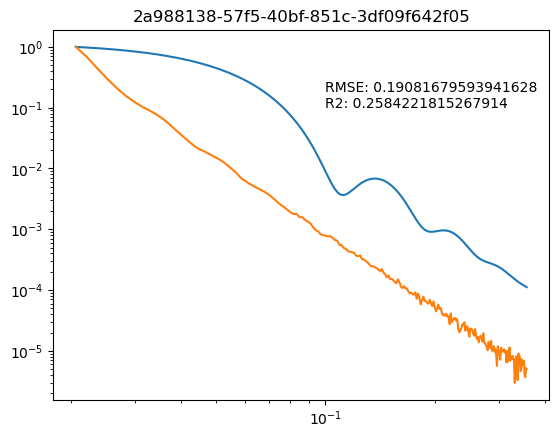

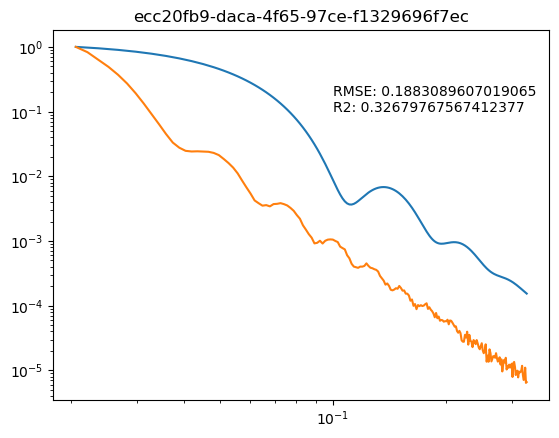

ValueError: Image size of 82041x665 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

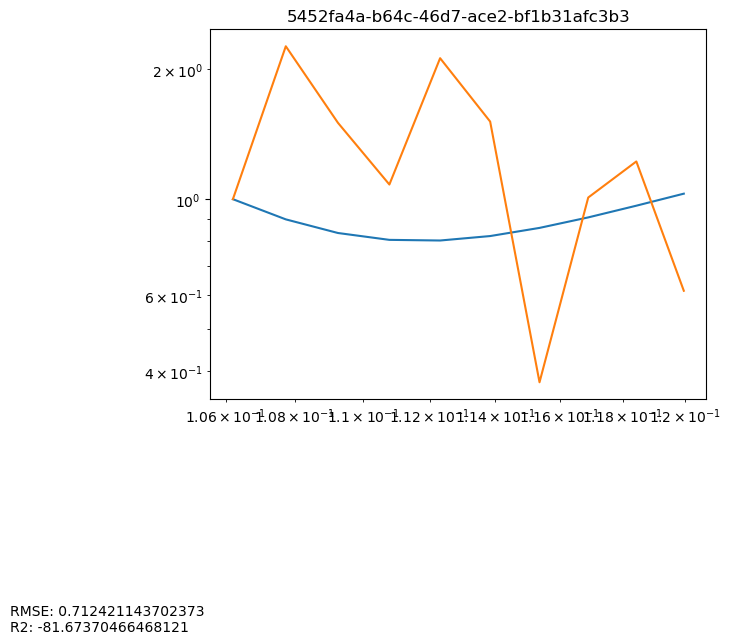

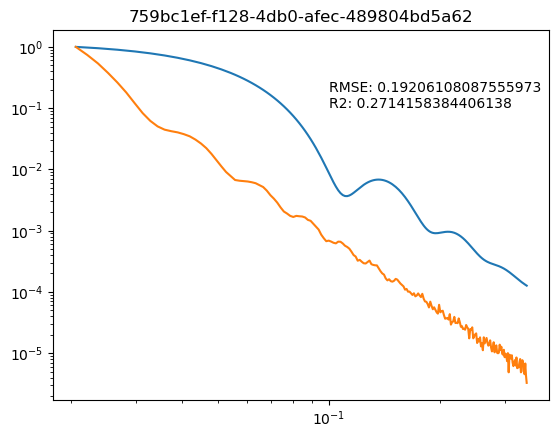

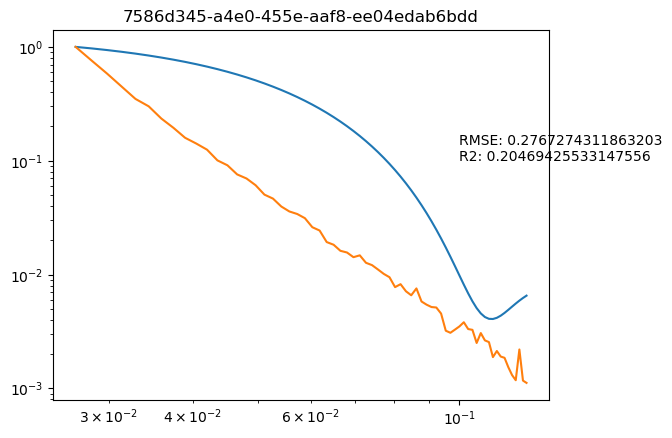

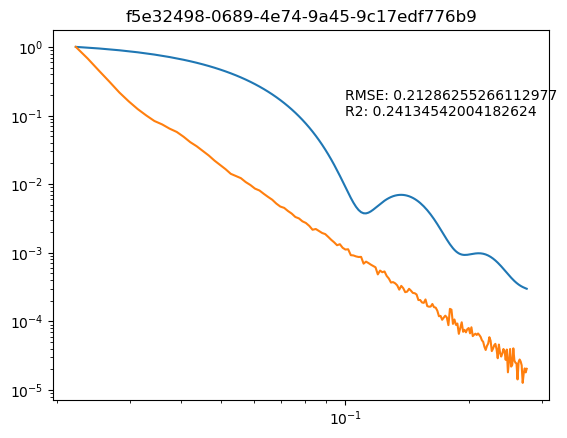

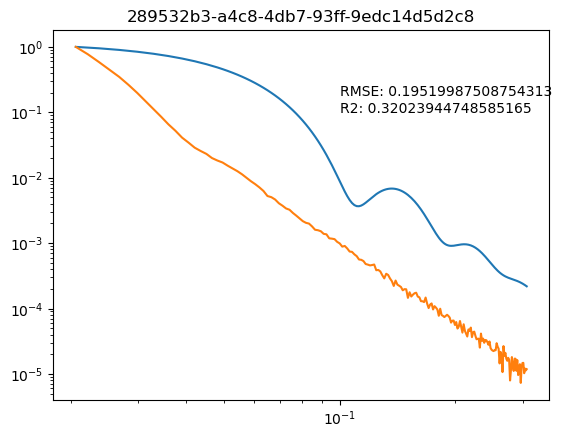

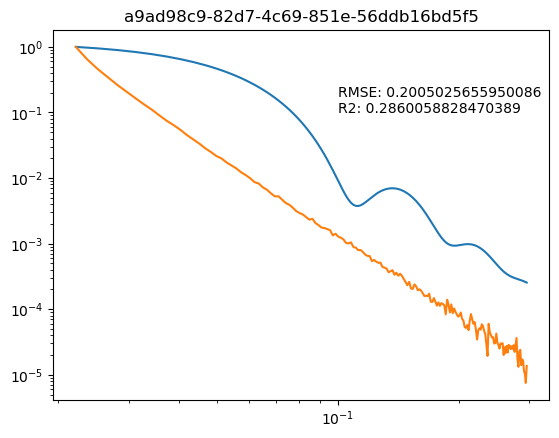

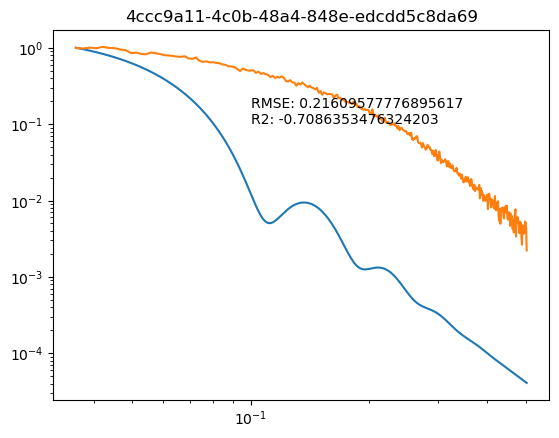

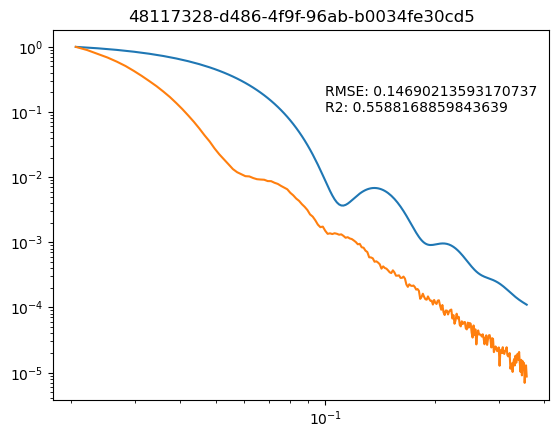

In [32]:
for uuid_val, data_val in data.items():
    print('starting ', uuid_val)
    data_val = data_val[0]
    q = data_val['q'].to_numpy()
    target_I = target_intensities(q, target_r, target_pdi)

    target_I = target_I/target_I[0]
    meas_I = data_val['I']/data_val['I'].iloc[0]

    rmse = metrics.root_mean_squared_error(target_I, meas_I)
    r2 = metrics.r2_score(target_I, meas_I)

    fig, ax = plt.subplots()

    ax.loglog(q, target_I)
    ax.loglog(q, meas_I)
    ax.text(0.1, 0.1, f'RMSE: {rmse}\nR2: {r2}')
    ax.set_title(uuid_val)

In [30]:
target_I

array([1.])

In [29]:
meas_I

0      1.000000
1      0.750377
2      0.556245
3      0.418552
4      0.315317
         ...   
146    0.000044
147    0.000022
148    0.000027
149    0.000032
150    0.000039
Name: I, Length: 151, dtype: float64

In [6]:
data = empty_data1D(q)

In [7]:
pars = dict(scale = 1, background = 0.001, sld = 1, radius = 50)
model = DirectModel(data, kernel)
#model.radius.range(10, 5000)
#model.scale.range(0, 5)

#model.radius_pd.range(0,0.2)
#model.radius_pd_type = 'lognormal'
model.model.info.parameters.kernel_parameters



[P<sld>, P<sld_solvent>, P<radius>]

In [8]:
kernel.info.parameters.kernel_parameters

[P<sld>, P<sld_solvent>, P<radius>]

In [9]:
I = model(radius = 40, radius_pd = 0.1, radius_pd_type = 'gaussian', radius_pd_n = 35, radius_pd_nsigma = 3)

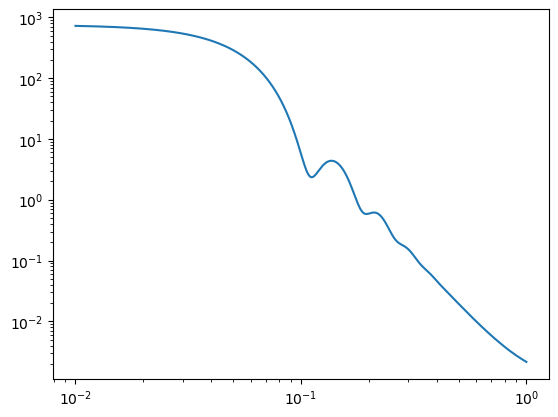

In [10]:
plt.loglog(q, I)

In [159]:
Model

sasmodels.bumps_model.Model